<a href="https://colab.research.google.com/github/JuniaBS/Exercicios_Analise_de_Dados_com_Python/blob/main/Estat%C3%ADstica_Probabilidade_e_Amostragem_Desafio_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:

In [ ]:
# para manipulação dos dados em python
import pandas as pd
import numpy as np

# para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt

# para obter estatisticas de teste
from scipy import stats
import scipy.stats as stats

In [ ]:
 # Carregando dados DF
df_populacao_brasileira = pd.read_csv('populacao_brasileira.csv')

In [ ]:
# Lendo as primeiras linhas
df_populacao_brasileira.head()

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
df_populacao_brasileira.describe()

,Unnamed: 0,idade,renda
count,1000.000000,1000.000000,1000.000000
mean,499.500000,40.986000,3082.537180
std,288.819436,13.497852,996.572239
min,0.000000,18.000000,103.740000
25%,249.750000,29.000000,2425.815000
50%,499.500000,42.000000,3076.415000
75%,749.250000,52.000000,3714.487500
max,999.000000,64.000000,5632.380000


In [ ]:
df_populacao_brasileira.shape

(1000, 7)

In [ ]:
df_populacao_brasileira.columns

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')

##1. Considere pessoas fluentes em inglês, qual a probabilidade complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês. Considere fluente quem tem o nível avançado.


In [ ]:
# Total de pessoas
total_pessoas = len(df_populacao_brasileira)

In [ ]:
# Total de pessoas fluentes (nível avançado)
total_fluentes_av = df_populacao_brasileira[df_populacao_brasileira['nível de proficiência em inglês'] == 'Avançado'].shape[0]

In [ ]:
# Cálculo da probabilidade de ser fluente
p_fluente = total_fluentes_av / total_pessoas

In [ ]:
# Cálculo da probabilidade complementar (não fluente)
p_nao_fluente = 1 - p_fluente

In [ ]:
print(f'A probabilidade de escolher uma pessoa não fluente em inglês é de {p_nao_fluente:.2f}')

A probabilidade de escolher uma pessoa não fluente em inglês é de 0.66


##2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual é a probabilidade de ela ter uma renda superior a 5 mil reais?


In [ ]:
# Filtrar o DataFrame para incluir apenas pessoas do PA ou AL
pessoas_alagoas_ou_para = (df_populacao_brasileira[(df_populacao_brasileira['estado'] == 'AL') | (df_populacao_brasileira['estado'] == 'PA')])

In [ ]:
total_pessoas = len(pessoas_alagoas_ou_para)

In [ ]:
# Filtrando e contando
pessoas_renda_5k = len(pessoas_alagoas_ou_para[pessoas_alagoas_ou_para['renda'] > 5000])

In [ ]:
# Calculando a probabilidade
probabilidade_renda_5k = pessoas_renda_5k / total_pessoas

In [ ]:
# Imprimindo o resultado
print(f'Probabilidade de renda superior a 5k: {probabilidade_renda_5k:.2%}')

Probabilidade de renda superior a 5k: 0.40%


##3. Descubra a probabilidade de uma pessoa ter ensino superior completo no estado do Amazonas. Qual a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo?


In [ ]:
# Filtrar a coluna 'escolaridade' e contar os tipos
contagem_tipos_escolaridade = df_populacao_brasileira['escolaridade'].value_counts()

print('Contagem de tipos de escolaridade:')
print(contagem_tipos_escolaridade)

Contagem de tipos de escolaridade:
escolaridade
Fundamental      266
Pós-graduação    253
Superior         243
Médio            238
Name: count, dtype: int64


In [ ]:
# Filtrar o DataFrame para incluir apenas pessoas do Amazonas
pessoas_amazonas = df_populacao_brasileira[df_populacao_brasileira['estado'] == 'AM']

In [ ]:
# Filtrando pessoas do AM com ensino superior
p_superior = pessoas_amazonas[(pessoas_amazonas['escolaridade'] == 'Superior')| (pessoas_amazonas['escolaridade'] == 'Pós-graduação')]

In [ ]:
# Contando o total
total_am = pessoas_amazonas.shape[0]

In [ ]:
# Proporção
prop_am = len(p_superior)/total_am
prop_am

0.5526315789473685

In [ ]:
# Imprimindo o resultado
prob_geom_5_pessoa = stats.geom.pmf(k=5, p=prop_am)
print(f'Probabilidade da quinta pessoa ter ensino superior: {prob_geom_5_pessoa:.2%}')

Probabilidade da quinta pessoa ter ensino superior: 2.21%


## 4. Considerando a renda das pessoas do nosso conjunto, podemos dizer que a renda de uma pessoa brasileira está na sua maioria em que faixa (faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

In [ ]:
# Definindo o intervalo
intervalo = 1500

#Criando a faixa de renda
faixas_renda = np.arange(0, df_populacao_brasileira['renda'].max() + intervalo, intervalo)

# Contando por faixa
contagem_por_faixa, _ = np.histogram(df_populacao_brasileira['renda'], bins=faixas_renda)

In [ ]:
# Identificando a faiza predominante
faixa_predominante = np.argmax(contagem_por_faixa) * intervalo

# Imprimindo o resultado
print("Faixa de renda predominante:", faixa_predominante, "-", faixa_predominante + intervalo)

Faixa de renda predominante: 3000 - 4500


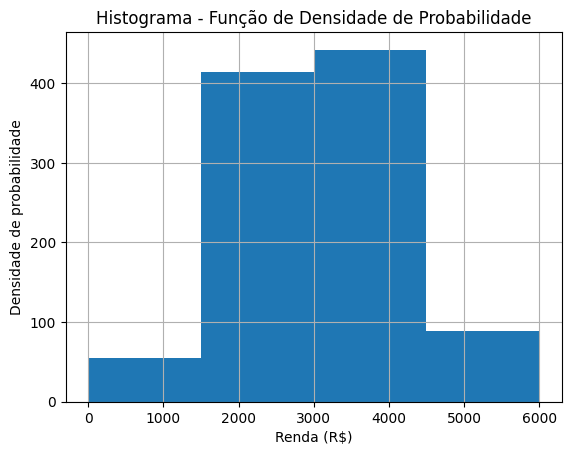

In [ ]:
# Criando Histograma
plt.hist(df_populacao_brasileira['renda'], bins=faixas_renda)
plt.title('Histograma - Função de Densidade de Probabilidade')
plt.xlabel('Renda (R$)')
plt.ylabel('Densidade de probabilidade')
plt.grid(True)
plt.show()

## 5. Calcule a média e a variância da renda da amostra. Depois faça a distribuição normal, inclua o gráfico.

In [ ]:
# Certifique-se de que a coluna 'renda' esteja no formato correto (int ou float)
df_populacao_brasileira['renda'] = pd.to_numeric(df_populacao_brasileira['renda'], errors='coerce')

In [ ]:
# Remover linhas com valores nulos na coluna 'renda'
df_populacao_brasileira = df_populacao_brasileira.dropna(subset=['renda'])

In [ ]:
# Calcular a média e a variância da renda
media_renda = df_populacao_brasileira['renda'].mean()
variancia_renda = df_populacao_brasileira['renda'].var()

In [ ]:
# Exibir média e variância
print(f'A média da renda é de R$ {media_renda:.2f}')
print(f'A Variância da renda é de R$ {variancia_renda:.2f}')

A média da renda é de R$ 3082.54
A Variância da renda é de R$ 993156.23


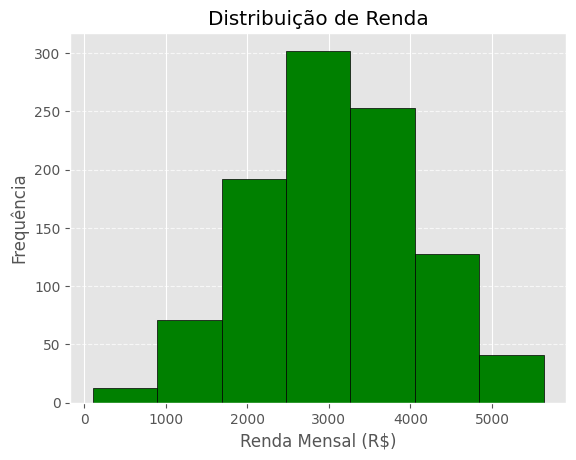

In [ ]:
# Escolher um estilo e personalizar as cores
plt.style.use('ggplot')
plt.hist(df_populacao_brasileira['renda'], bins=7, color='green', edgecolor='black')

# Personalizar outros elementos do gráfico
plt.title('Distribuição de Renda')
plt.xlabel('Renda Mensal (R$)')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

## 6. Primeiro considere a probabilidade encontrada no nosso conjunto de pessoas com escolaridade de pós-graduação. Considerando a amostra de população brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação?


In [ ]:
# Calcular a proporção de pessoas com pós-graduação
p_pos_graduacao = len(df_populacao_brasileira[df_populacao_brasileira['escolaridade'] == 'Pós-graduação']) / len(df_populacao_brasileira)
p_pos_graduacao

0.253

In [ ]:
# Parâmetros para a distribuição
n = 1000000
k= 243000

In [ ]:
# Calcular o coeficiente binomial
prob_pos_grad = stats.binom.pmf(k, n, p_pos_graduacao)

# Exibir resultados
print(f'Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: {prob_pos_grad}')

Probabilidade de encontrarmos 243 mil pessoas com pós-graduação: 1.1104854289794913e-119


##7. Somando as densidades nós temos a função de densidade acumulada. Considerando a coluna ‘Escolaridade’ faça a função de densidade acumulada discreta para cada nível de escolaridade.

In [ ]:
# Definindo os níveis de escolaridade
niveis_escolaridade = ['Fundamental', 'Médio', 'Superior', 'Pós-graduação']

In [ ]:
# Contar o número de pessoas em cada nível de escolaridade
contagem_escolaridade = df_populacao_brasileira['escolaridade'].value_counts().reindex(niveis_escolaridade, fill_value=0)

In [ ]:
# Calcular a densidade acumulada
densidade_acumulada = contagem_escolaridade.cumsum() / contagem_escolaridade.sum()

In [ ]:
# Exibir resultados
print("Densidade Acumulada para cada Nível de Escolaridade:")
print(densidade_acumulada)

Densidade Acumulada para cada Nível de Escolaridade:
escolaridade
Fundamental      0.266
Médio            0.504
Superior         0.747
Pós-graduação    1.000
Name: count, dtype: float64


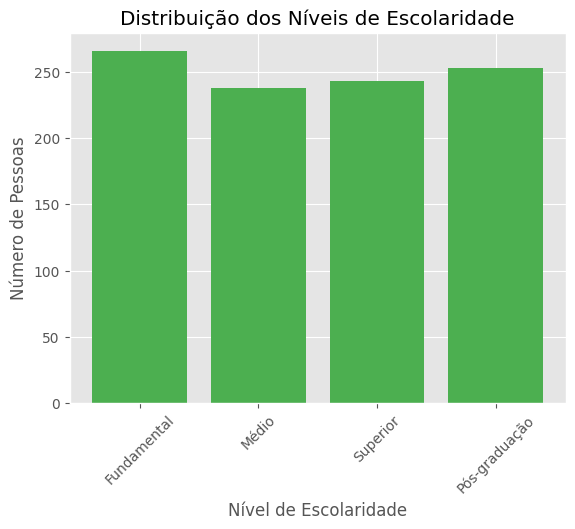

In [ ]:
# Criando o histograma
plt.bar(niveis_escolaridade, contagem_escolaridade, color='#4CAF50')

# Personalizando o gráfico
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição dos Níveis de Escolaridade')
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização

plt.show()

##8. Qual a margem de erro amostral da proporção populacional considerando a proporção de pessoas com nível de inglês intermediário?


In [ ]:
# Filtrar os dados
df_intermediario = df_populacao_brasileira[df_populacao_brasileira['nível de proficiência em inglês'] == 'Intermediário']
df_intermediario.shape

(329, 7)

In [ ]:
# O tamanho da amostra (n) é 329
n = 329

# Calcular a proporção amostral (p)
p = n / len(df_populacao_brasileira)

# Definir o nível de confiança
confidence_level = 0.95

# Valor crítico Z para o nível de confiança (1.96 para 95% de confiança)
z = stats.norm.ppf(1 - (1 - confidence_level) / 2)


In [ ]:
# Calcular a margem de erro
margem_erro = z * np.sqrt((p * (1 - p)) / len(df_populacao_brasileira))

# Exibir a margem de erro
print(f"A margem de erro é: {margem_erro:.3f}")

A margem de erro é: 0.029


##9. Calcula a renda da população. Qual a probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média?

In [ ]:
# Calcular a média da renda da população
media_renda = df_populacao_brasileira['renda'].mean()
print(f'A média da renda da população é de R$ {media_renda:.2f}')

A média da renda da população é de R$ 3082.54


In [ ]:
# Definir o limite superior da renda
limite_superior = media_renda + 1000

In [ ]:
# Calcular a proporção de pessoas com renda superior ao limite
total_pessoas = df_populacao_brasileira.shape[0]
total_superior = df_populacao_brasileira[df_populacao_brasileira['renda'] > limite_superior].shape[0]
proporcao_superior = total_superior / total_pessoas

In [ ]:
# Calcular a probabilidade de encontrar 60 pessoas com renda superior ao limite
n = total_pessoas  # tamanho da amostra total
k = 60  # número de pessoas com renda superior à média
probabilidade = stats.binom.pmf(k, n, proporcao_superior)

In [ ]:
# Exibir resultados
print(f'O limite superior da renda é de R${limite_superior:.2f}')
print(f'A proporção de pessoas com renda superior a R$ {limite_superior:.2f} é de {proporcao_superior:.4f}')
print(f'A probabilidade de encontrar 60 pessoas com a renda superior a R$ {limite_superior:.2f} é de {probabilidade:.4f}')

O limite superior da renda é de R$4082.54
A proporção de pessoas com renda superior a R$ 4082.54 é de 0.1610
A probabilidade de encontrar 60 pessoas com a renda superior a R$ 4082.54 é de 0.0000


##10. Qual a probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês?

In [ ]:
# Filtrar apenas pessoas do Sudeste e incluir em um DF
sudeste = df_populacao_brasileira[df_populacao_brasileira['estado'].isin(['MG', 'ES', 'RJ', 'SP'])]

In [ ]:
# Filtrar apenas homens com ensino fundamental e renda maior que 2 mil reais e incluir em um DF
pessoas_filtro = sudeste[(sudeste['sexo'] == 'M') &
                          (sudeste['escolaridade'] == 'Fundamental') &
                          (sudeste['renda'] > 2000.00)]

In [ ]:
# 3. Calcular a probabilidade
total_pessoas_sudeste = sudeste.shape[0]
total_pessoas_filtro = pessoas_filtro.shape[0]

if total_pessoas_sudeste > 0:
    probabilidade = total_pessoas_filtro / total_pessoas_sudeste
else:
    probabilidade = 0

In [ ]:
# Exibir resultados
print(f'O total de pessoas do Sudeste é de {total_pessoas_sudeste}')
print(f'O total de homens com ensino fundamental e renda maior que 2 mil é de {total_pessoas_filtro}')
print(f'A probabilidade de escolher alguém do Sudeste que seja homem, com ensino fundamental e renda maior que 2 mil: {probabilidade:.4f}')

O total de pessoas do Sudeste é de 157
O total de homens com ensino fundamental e renda maior que 2 mil é de 19
A probabilidade de escolher alguém do Sudeste que seja homem, com ensino fundamental e renda maior que 2 mil: 0.1210
